** Airbnb Data Analysis - Determining the relation of house prices and amenities using Random Forest Regressor**

In [12]:
# Reading the Dataset into pandas dataframe
import pandas as pd
import os
mydir = os.getcwd()
print(mydir + '/airbnbData.csv')
housing = pd.read_csv(mydir + '/airbnbData.csv', encoding='ISO-8859-1')
housing.head()

C:\Users\saj16\PycharmProjects\AirbnbDataAnalysisProject/airbnbData.csv


,ListingID,Title,UserID,baseurl,Price,AboutListing,HostName,MemberDate,Lat,Long,...,RespTime,S_Accomodates,S_Bathrooms,S_BedType,S_Bedrooms,S_CheckIn,S_Checkout,S_NumBeds,S_PropType,ShortDesc
0,281552,Harvard Sq Large 1BR overlooks park,1467518,https://www.airbnb.com/s/Cambridge--MA?page=1,175,\n,Mary Catherine,December 2011,42.377119,-71.120112,...,within a few hours,3,1,Not Found,1,Not Found,Not Found,2,Apartment,\n Entire home/apt Ìâåá 24 reviews Ìâåá Har...
1,182613,Luxury 2BR condo Charlestown Boston,875739,https://www.airbnb.com/s/Charlestown-MA?page=1,249,Entire large modern quiet city condo near ever...,Max,July 2011,42.377387,-71.060435,...,within an hour,8,1,Not Found,2,Not Found,Not Found,3,Apartment,\n Entire home/apt Ìâåá 17 reviews Ìâåá Cha...
2,1587540,Cozy House on Bunker Hill in Boston,2004732,https://www.airbnb.com/s/Charlestown-MA?page=1,225,\n,Finola,March 2012,42.378898,-71.061182,...,within an hour,4,1.5,Not Found,3,12:00 PM (noon),Not Found,3,House,\n Entire home/apt Ìâåá 5 reviews Ìâåá Char...
3,469506,"Luxury 1bd, Safe/Central Brookline",1766477,https://www.airbnb.com/s/Brookline--MA?page=1,140,\n,Rupal,February 2012,42.338848,-71.135475,...,within an hour,2,1,Real Bed,1,4:00 PM,11:00 AM,1,Apartment,\n Entire home/apt Ìâåá 60 reviews Ìâåá Bro...
4,3937268,Boston bedroom & private bathroom,2530197,https://www.airbnb.com/s/Brookline--MA?page=1,99,I offer a private basement bedroom with a priv...,Natasha,June 2012,42.343206,-71.119955,...,within a few hours,2,1,Real Bed,1,2:00 PM,10:00 AM,1,House,\n Private room Ìâåá 11 reviews Ìâåá Brookl...


C:\Users\saj16\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\saj16\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


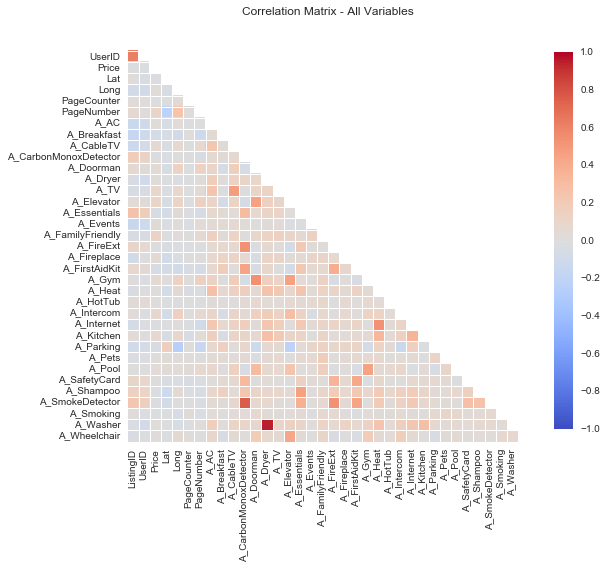

In [19]:
# Correlation Plot
import matplotlib.pyplot as plt # module for plotting 
import seaborn as sns
from seaborn.linearmodels import corrplot
%matplotlib inline 

sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(9, 9))
corrplot(housing, annot=False, sig_stars=False, diag_names=False, ax=ax)
plt.title('Correlation Matrix - All Variables')
plt.show()

**Figuring important attributes to predict the price of future housing on Airbnb using Random Forest. **

In [39]:
cluster_dat = housing[[u'A_AC', u'A_Breakfast', u'A_CableTV', u'A_CarbonMonoxDetector', u'A_Doorman', 
                      u'A_Dryer', u'A_TV', u'A_Elevator', u'A_Essentials', u'A_Events', u'A_FamilyFriendly', 
                      u'A_FireExt', u'A_Fireplace', u'A_FirstAidKit', u'A_Gym', u'A_Heat', u'A_HotTub', u'A_Intercom', 
                      u'A_Internet', u'A_Kitchen', u'A_Parking', u'A_Pets', u'A_Pool', 
                      u'A_SafetyCard', u'A_Shampoo', u'A_SmokeDetector', u'A_Smoking', u'A_Washer', u'A_Wheelchair']]

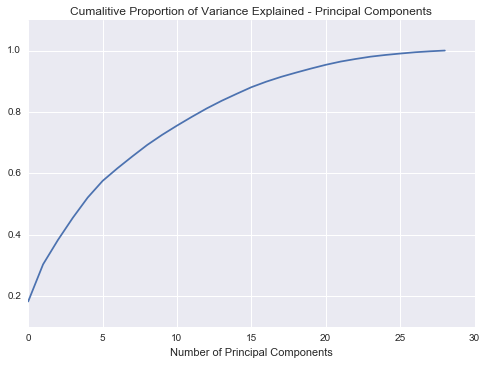

In [41]:
# Applying PCA for Dimensionality reduction
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca = PCA()
pcaResults = pca.fit(cluster_dat)

plt.plot(npcaResultsp.cumsum(pcaResults.explained_variance_ratio_))
plt.title('Cumalitive Proportion of Variance Explained - Principal Components')
plt.xlabel('Number of Principal Components')
plt.show()

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer
from scipy.stats import randint

#Create Parameter Grid
tunedParameters = {'n_estimators': randint(low=1, high=21)}

forest_reg = RandomForestRegressor(n_jobs = 1)
clf = RandomizedSearchCV(forest_reg, param_distributions=tunedParameters, n_iter=10, cv=10)

#Fit Random Forest
Y = housing[u'Price'].astype(float)
X = cluster_dat[[u'A_AC', u'A_Breakfast', u'A_CableTV', u'A_CarbonMonoxDetector', 
                   u'A_Doorman', u'A_Dryer', u'A_TV', u'A_Elevator', u'A_Essentials', u'A_Events', 
                   u'A_FamilyFriendly', u'A_FireExt', u'A_Fireplace', u'A_FirstAidKit', u'A_Gym', 
                   u'A_Heat', u'A_HotTub', u'A_Intercom', u'A_Internet', u'A_Kitchen', u'A_Parking', 
                   u'A_Pets', u'A_Pool', u'A_SafetyCard', u'A_Shampoo', u'A_SmokeDetector', u'A_Smoking', 
                   u'A_Washer', u'A_Wheelchair']]

ImputeMissing = Imputer(strategy = 'most_frequent')
Xt = pd.DataFrame(ImputeMissing.fit_transform(X))
Xt.columns = X.columns
clf.fit(Xt, Y)

num_trees = []
meanCVScore = []
stdCVScore = []

for n, mean, cv in clf.grid_scores_:
    num_trees.append(n['n_estimators'])
    meanCVScore.append(mean)
    stdCVScore.append(np.std(cv) * 2)

C:\Users\saj16\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [67]:
# Lets print the grid_scores to determine the best model
clf.grid_scores_

C:\Users\saj16\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -6.21534, std: 8.88483, params: {'n_estimators': 3},
 mean: -4.87263, std: 9.13634, params: {'n_estimators': 8},
 mean: -4.83718, std: 6.80300, params: {'n_estimators': 13},
 mean: -3.15971, std: 5.78795, params: {'n_estimators': 14},
 mean: -1.94033, std: 1.90026, params: {'n_estimators': 14},
 mean: -6.21977, std: 9.09012, params: {'n_estimators': 6},
 mean: -1.05542, std: 0.85853, params: {'n_estimators': 6},
 mean: -3.91062, std: 5.00818, params: {'n_estimators': 4},
 mean: -1.54010, std: 2.06283, params: {'n_estimators': 13},
 mean: -2.81867, std: 4.27715, params: {'n_estimators': 18}]

In [69]:
tunedParameters = [{'n_estimators':[7]}]
clf2 = GridSearchCV(RandomForestRegressor(n_jobs = 1, criterion='mse'), 
                    param_grid = tunedParameters, cv=10)
#Fit Model
clf2.fit(Xt, Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [7]}], pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [70]:
FeatImp = pd.DataFrame({'feature': list(Xt.columns), 'importance': list(clf2.best_estimator_.feature_importances_)})
FeatImp = FeatImp.sort('importance', ascending = False)
#Set Index To Field You want to Sort Bar Chart By
FeatImp = FeatImp.set_index('feature')
FeatImp.head(20)

C:\Users\saj16\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,importance
feature,
A_Essentials,0.341784
A_SmokeDetector,0.178341
A_FamilyFriendly,0.118997
A_AC,0.075010
A_TV,0.058831
A_Washer,0.056249
A_Pool,0.034518
A_Dryer,0.021259
A_Elevator,0.016411


Among the amenities in the house, the most important of all essentials, SmokeDetector and FamilyFriendly that were determinants of price of any new house. 